# 23/CS/301 Piyush Yadav
## Lab 07– Classification Models
## Learning Outcomes
### By the end of this lab, students will be able to:
- Train Naïve Bayes and SVM
- Evaluate models using accuracy, ROC AUC, and confusion matrix.

### Step 1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

### Step 2: Load & Preprocess Dataset

In [4]:
# Load churn dataset
df = pd.read_csv("churn.csv")

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features & target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Scale features (important for SVM)
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Step 3: Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Step 4: Fit Decision Tree

- Naïve Bayes

In [6]:
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


- SVM (with probability for ROC curve)

In [7]:
svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Step 5: Evaluate Models


Naive Bayes Results:
Accuracy: 0.7459190915542938
ROC AUC: 0.820127102224289
Confusion Matrix:
 [[783 252]
 [106 268]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1035
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.75      0.76      1409



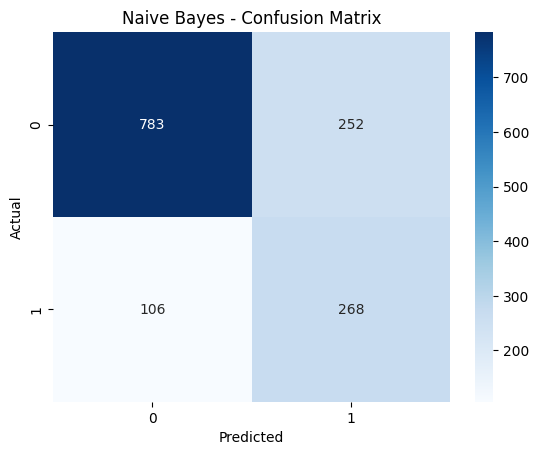


SVM Results:
Accuracy: 0.7920511000709723
ROC AUC: 0.8022178304787001
Confusion Matrix:
 [[939  96]
 [197 177]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



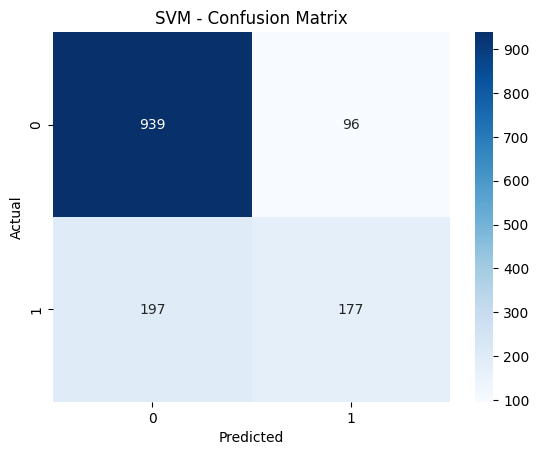

In [8]:
models = {"Naive Bayes": nb, "SVM": svm}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    results.append([name, acc, roc])

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("ROC AUC:", roc)
    print("Confusion Matrix:\n", cm)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### Step 6: Compare ROC Curves

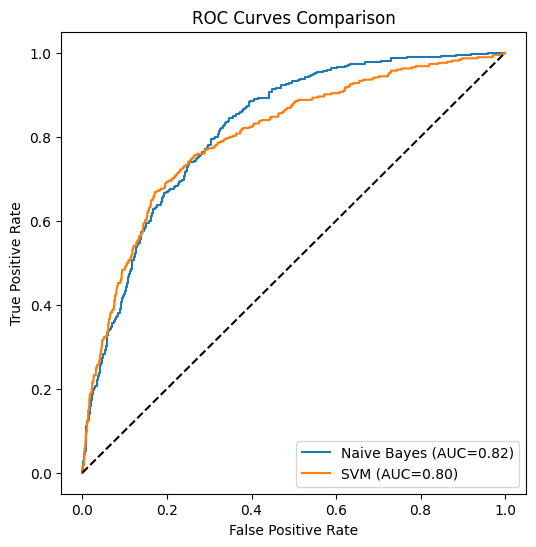

In [9]:
plt.figure(figsize=(6,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test,y_prob):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

### Step 7: Metrics Table

In [10]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
print(results_df)

         Model  Accuracy   ROC AUC
0  Naive Bayes  0.745919  0.820127
1          SVM  0.792051  0.802218
